In [18]:
import pandas as pd
import seaborn as sns
# Load the dataset
url = "https://raw.githubusercontent.com/patilgirish815/Kidney_Cancer_Prediction_Using_Machine_Learning/main/dataset/kidney_disease.csv"
data = pd.read_csv(url)

# Display the first few rows
print(data.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [19]:
# Fill missing values in numeric columns with column mean
data = data.fillna(data.mean(numeric_only=True))

# Fill missing values in object columns with the mode (most frequent value)
for column in data.select_dtypes(include='object').columns:
    data[column] = data[column].fillna(data[column].mode()[0])


In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])


In [21]:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = data.drop('classification', axis=1)
y = data['classification']

In [22]:
from imblearn.over_sampling import SMOTE

# Fix: reduce the number of neighbors used in SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X, y = smote.fit_resample(X, y)


In [23]:
# Take a random sample of 360 rows
from sklearn.utils import resample

X_sample, y_sample = resample(X, y, n_samples=360, random_state=42, stratify=y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)


In [25]:

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        21

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Confusion Matrix:
 [[20  0  0]
 [ 0 31  0]
 [ 0  0 21]]


In [28]:
# from sklearn.svm import SVC

# # Initialize SVM classifier
# svm_classifier = SVC(kernel='linear', random_state=42)
# svm_classifier.fit(X_train, y_train)

# # Predict and evaluate
# y_pred_svm = svm_classifier.predict(X_test)
# print("SVM Results:")
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Classification Report:\n", classification_report(y_test, y_pred_svm))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


In [29]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Results:
Accuracy: 0.9861111111111112
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        21

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72

Confusion Matrix:
 [[19  1  0]
 [ 0 31  0]
 [ 0  0 21]]


c:\Users\Bharath\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


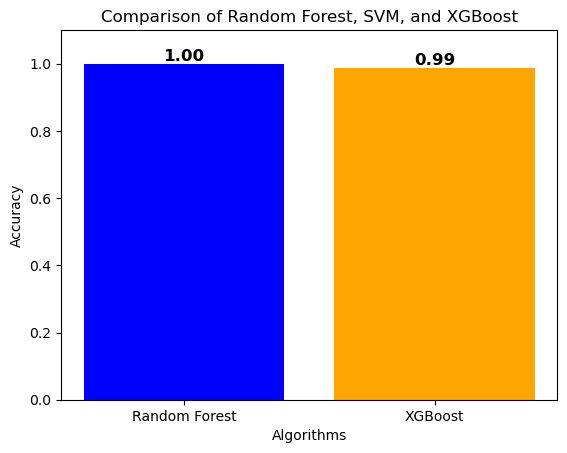

In [30]:
import matplotlib.pyplot as plt

# Data for plotting
algorithms = ['Random Forest', 'XGBoost']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]

# Plotting
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green'])

# Adding accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Random Forest, SVM, and XGBoost')
plt.ylim(0, 1.1)  # Extend y-axis slightly for better readability of values
plt.show()

In [31]:
best_algorithm = max(zip(accuracies, algorithms))
print(f"The best performing algorithm is {best_algorithm[1]} with an accuracy of {best_algorithm[0]:.2f}")

The best performing algorithm is Random Forest with an accuracy of 1.00


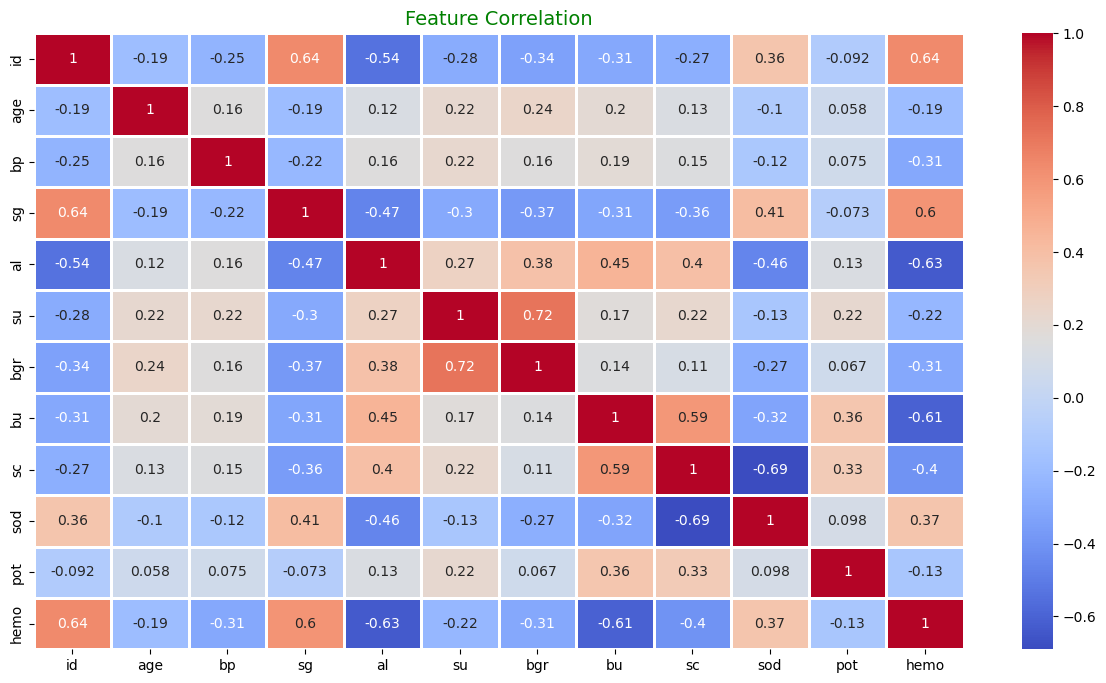

In [32]:
df = pd.read_csv(url)

df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 8))
plt.title("Feature Correlation", color="green", fontsize=14)
sns.heatmap(df_numeric.corr(), linewidth=1, annot=True, cmap="coolwarm")
plt.show()


<Axes: >

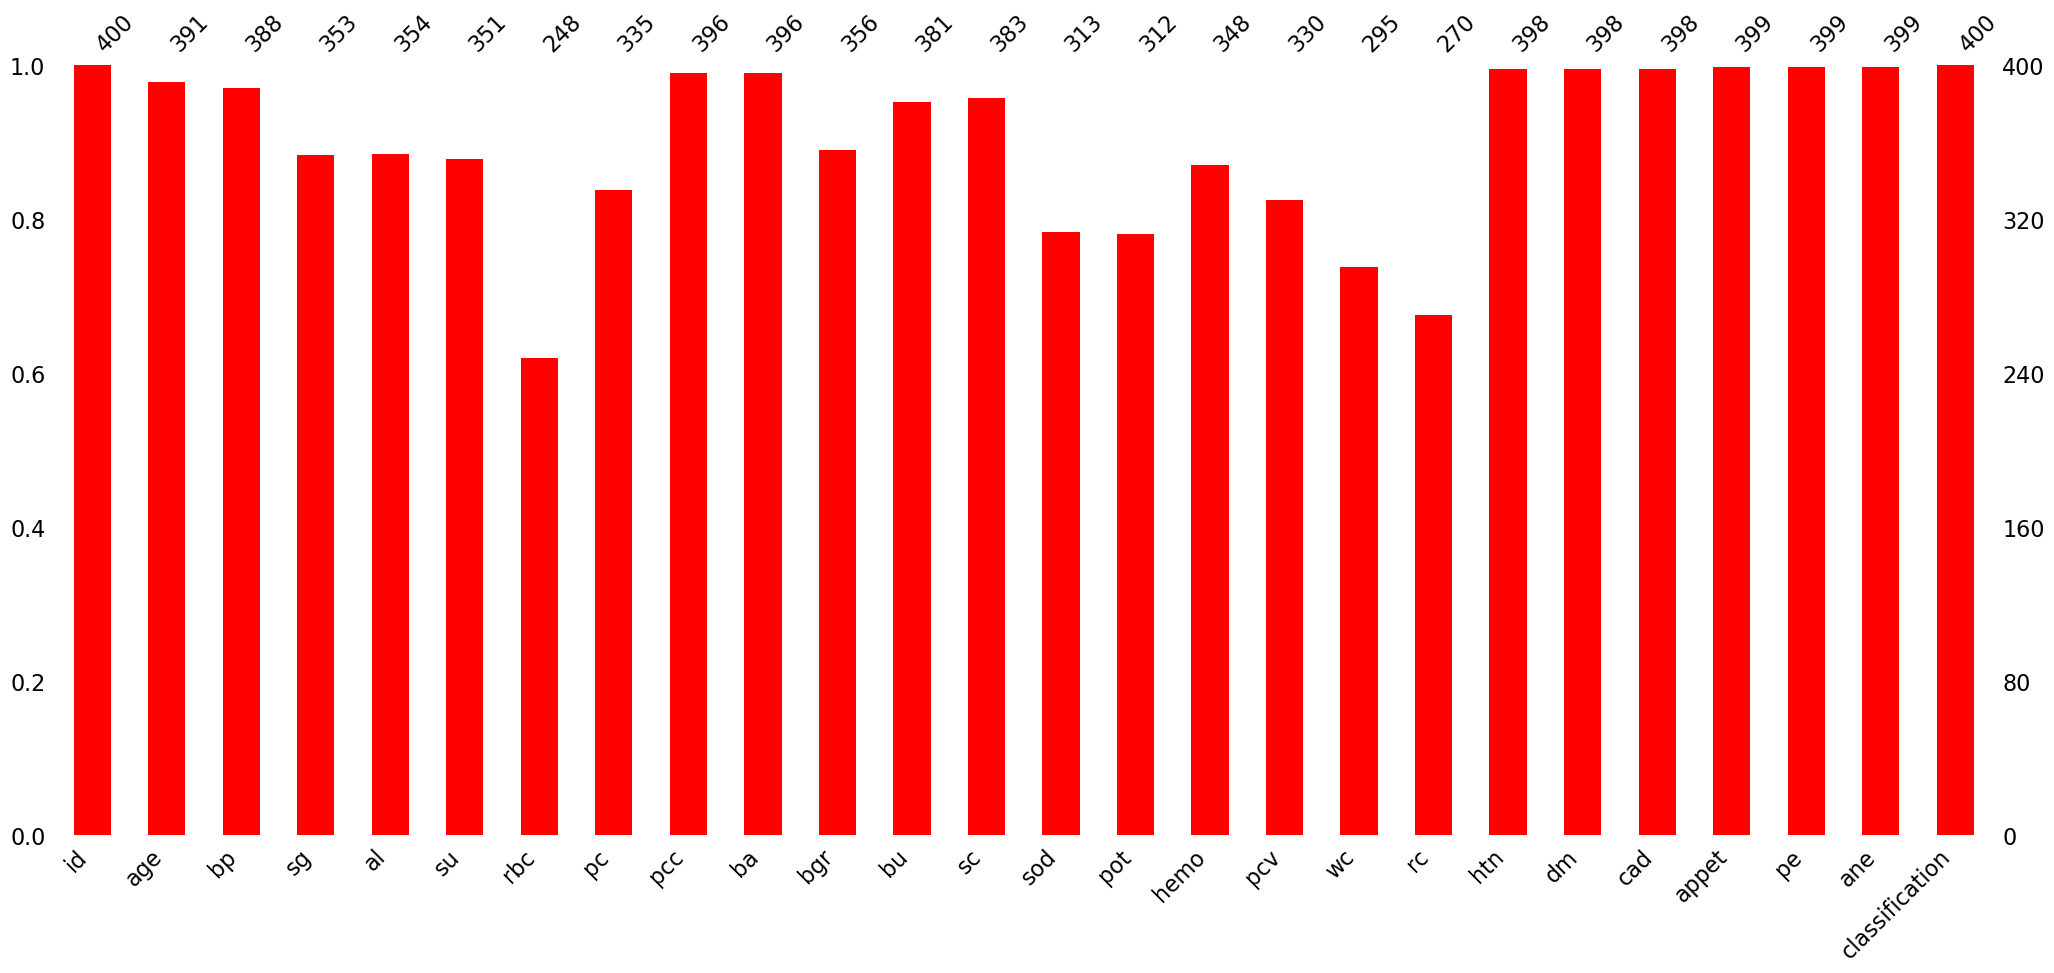

In [33]:
import missingno as msn

# Visualize missing data with a red bar plot
msn.bar(df, color="red")
